In [1]:
import sys

import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd

import networkx as nx

import shapely as sh
from shapely import geometry

import utilities.common as uc

import utilities.get_random_city as grc

import utilities.get_graph as gg
import utilities.forge_graph as fg
import utilities.visualise_graph as vg

random.seed(0)

%load_ext autoreload
%autoreload 2

INFO: 2019-09-10 20:58:41,706: get_random_city.py: 79:
	217 segments
	33 one-way
	92 two-way


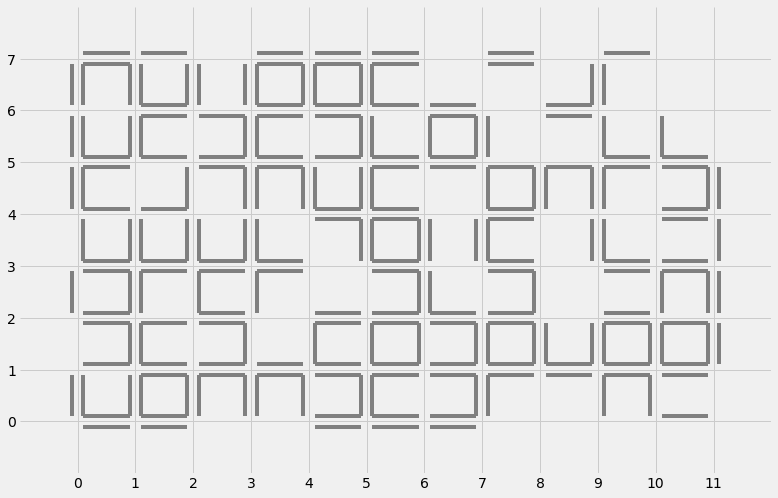

In [19]:
random_city = grc.get_random_city(
    city_size=[12, 8],
    frequencies=[0.3, 0.1, 0.1, 0.5]
#     city_size=[3, 3],
#     frequencies=[0., 0., 0., 1.]
    )
grc.plot_area(random_city)

In [11]:
# for e in sg.edges:
#     print(sg.get_edge_data(*e)['coordinates'])

INFO: 2019-09-10 21:16:47,996: visualise_graph.py: 108:
	4 dead ends
	10 disconnected nodes


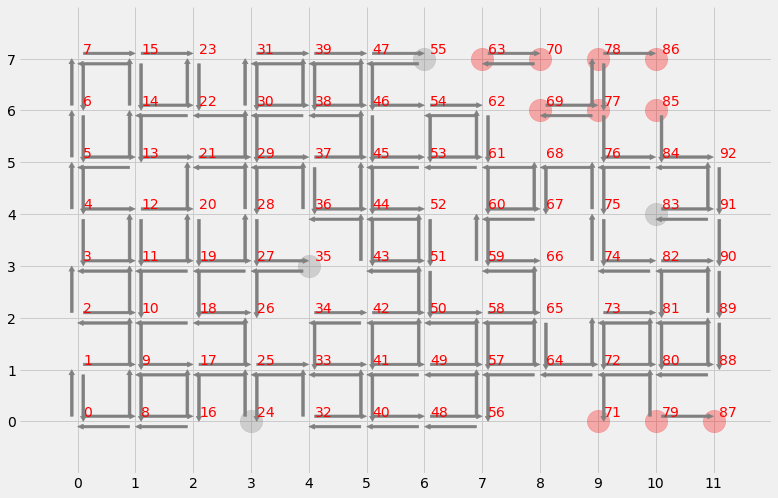

In [34]:
sg = gg.get_simple_graph(random_city)
vg.visualise_simple_graph(sg)

In [ ]:
# fg.get_splitting_nodes(sg)

In [ ]:
mg = gg.get_manoeuvre_graph(random_city)
vg.visualise_manoeuvre_graph(mg)
print(len(mg.nodes()))
print(len(mg.edges()))
# 	straight drives: 464
# 	right turns: 461
# 	left turns: 474
# 	u-turns: 682

In [ ]:
mg = fg.join_split_edges(mg)
vg.visualise_manoeuvre_graph(mg)

In [ ]:
# splitting_nodes = []
# for n in mg.nodes():
#     if ((len(mg.in_edges(n))==1)
#         and (len(mg.out_edges(n))==1)):
#         segment_i = mg.get_edge_data(*list(mg.in_edges(n))[0])
#         segment_j = mg.get_edge_data(*list(mg.out_edges(n))[0])
#         if ((segment_i['manoeuvre'] == 'go_straight')
#             and (segment_j['manoeuvre'] == 'go_straight')):
#             splitting_nodes.append(n)
# print(splitting_nodes)

In [ ]:
dg = gg.get_random_district_graph(mg)
vg.visualise_manoeuvre_graph(dg)

In [ ]:
dg = fg.add_connecting_grafts(dg, mg)
vg.visualise_manoeuvre_graph(dg)

In [ ]:
icg = gg.get_inverted_graph(random_city)
print(len(icg.nodes()))
print(len(icg.edges()))
vg.visualise_manoeuvre_graph(icg)
# 	straight drives: 464
# 	right turns: 461
# 	left turns: 474
# 	u-turns: 682

In [ ]:
idg = gg.get_random_district_graph(icg)
vg.visualise_manoeuvre_graph(idg)

In [ ]:
idg = fg.add_connecting_grafts(idg, icg)
vg.visualise_manoeuvre_graph(idg)

In [ ]:
nx.is_strongly_connected(ig)

In [ ]:
def prune_u_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'make_u_turn':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)
                
def prune_left_turns(
        g: nx.DiGraph):
    edges = list(g.edges())
    for e in edges:
        manoeuvre = g.get_edge_data(*e)['manoeuvre']
        if manoeuvre == 'turn_left':
            test_g = g.copy()
            test_g.remove_edge(*e)
            if nx.is_strongly_connected(test_g):
                inverted_graph.remove_edge(*e)

In [ ]:
prune_u_turns(inverted_graph)
prune_left_turns(inverted_graph)

In [ ]:
vis_g.visualise_graph(inverted_graph)

In [ ]:
import geopandas as gpd

In [ ]:
np.arange(0.5, 17.6 + 1.0, 1)

In [ ]:
[-1, 5] > [0, 1]